# Exploratory Data Analysis

## Import packages

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [3]:
client_df = pd.read_csv('d:\individual test\BCG project\client_data (1).csv')
price_df = pd.read_csv('d:\individual test\BCG project\price_data (1).csv')

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:2: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:2: SyntaxWarning: invalid escape sequence '\i'
C:\Users\xuziw\AppData\Local\Temp\ipykernel_27208\3990402225.py:1: SyntaxWarning: invalid escape sequence '\i'
  client_df = pd.read_csv('d:\individual test\BCG project\client_data (1).csv')
C:\Users\xuziw\AppData\Local\Temp\ipykernel_27208\3990402225.py:2: SyntaxWarning: invalid escape sequence '\i'
  price_df = pd.read_csv('d:\individual test\BCG project\price_data (1).csv')


View the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [4]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [5]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [6]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets.

In [8]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [9]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization

In [13]:
# Missing Values Analysis
print("\nMissing Values:")
missing_values = client_df.isnull().sum()
missing_percent = (missing_values / len(client_df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])
print(missing_df[missing_df['Missing Count'] > 0])


Missing Values:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


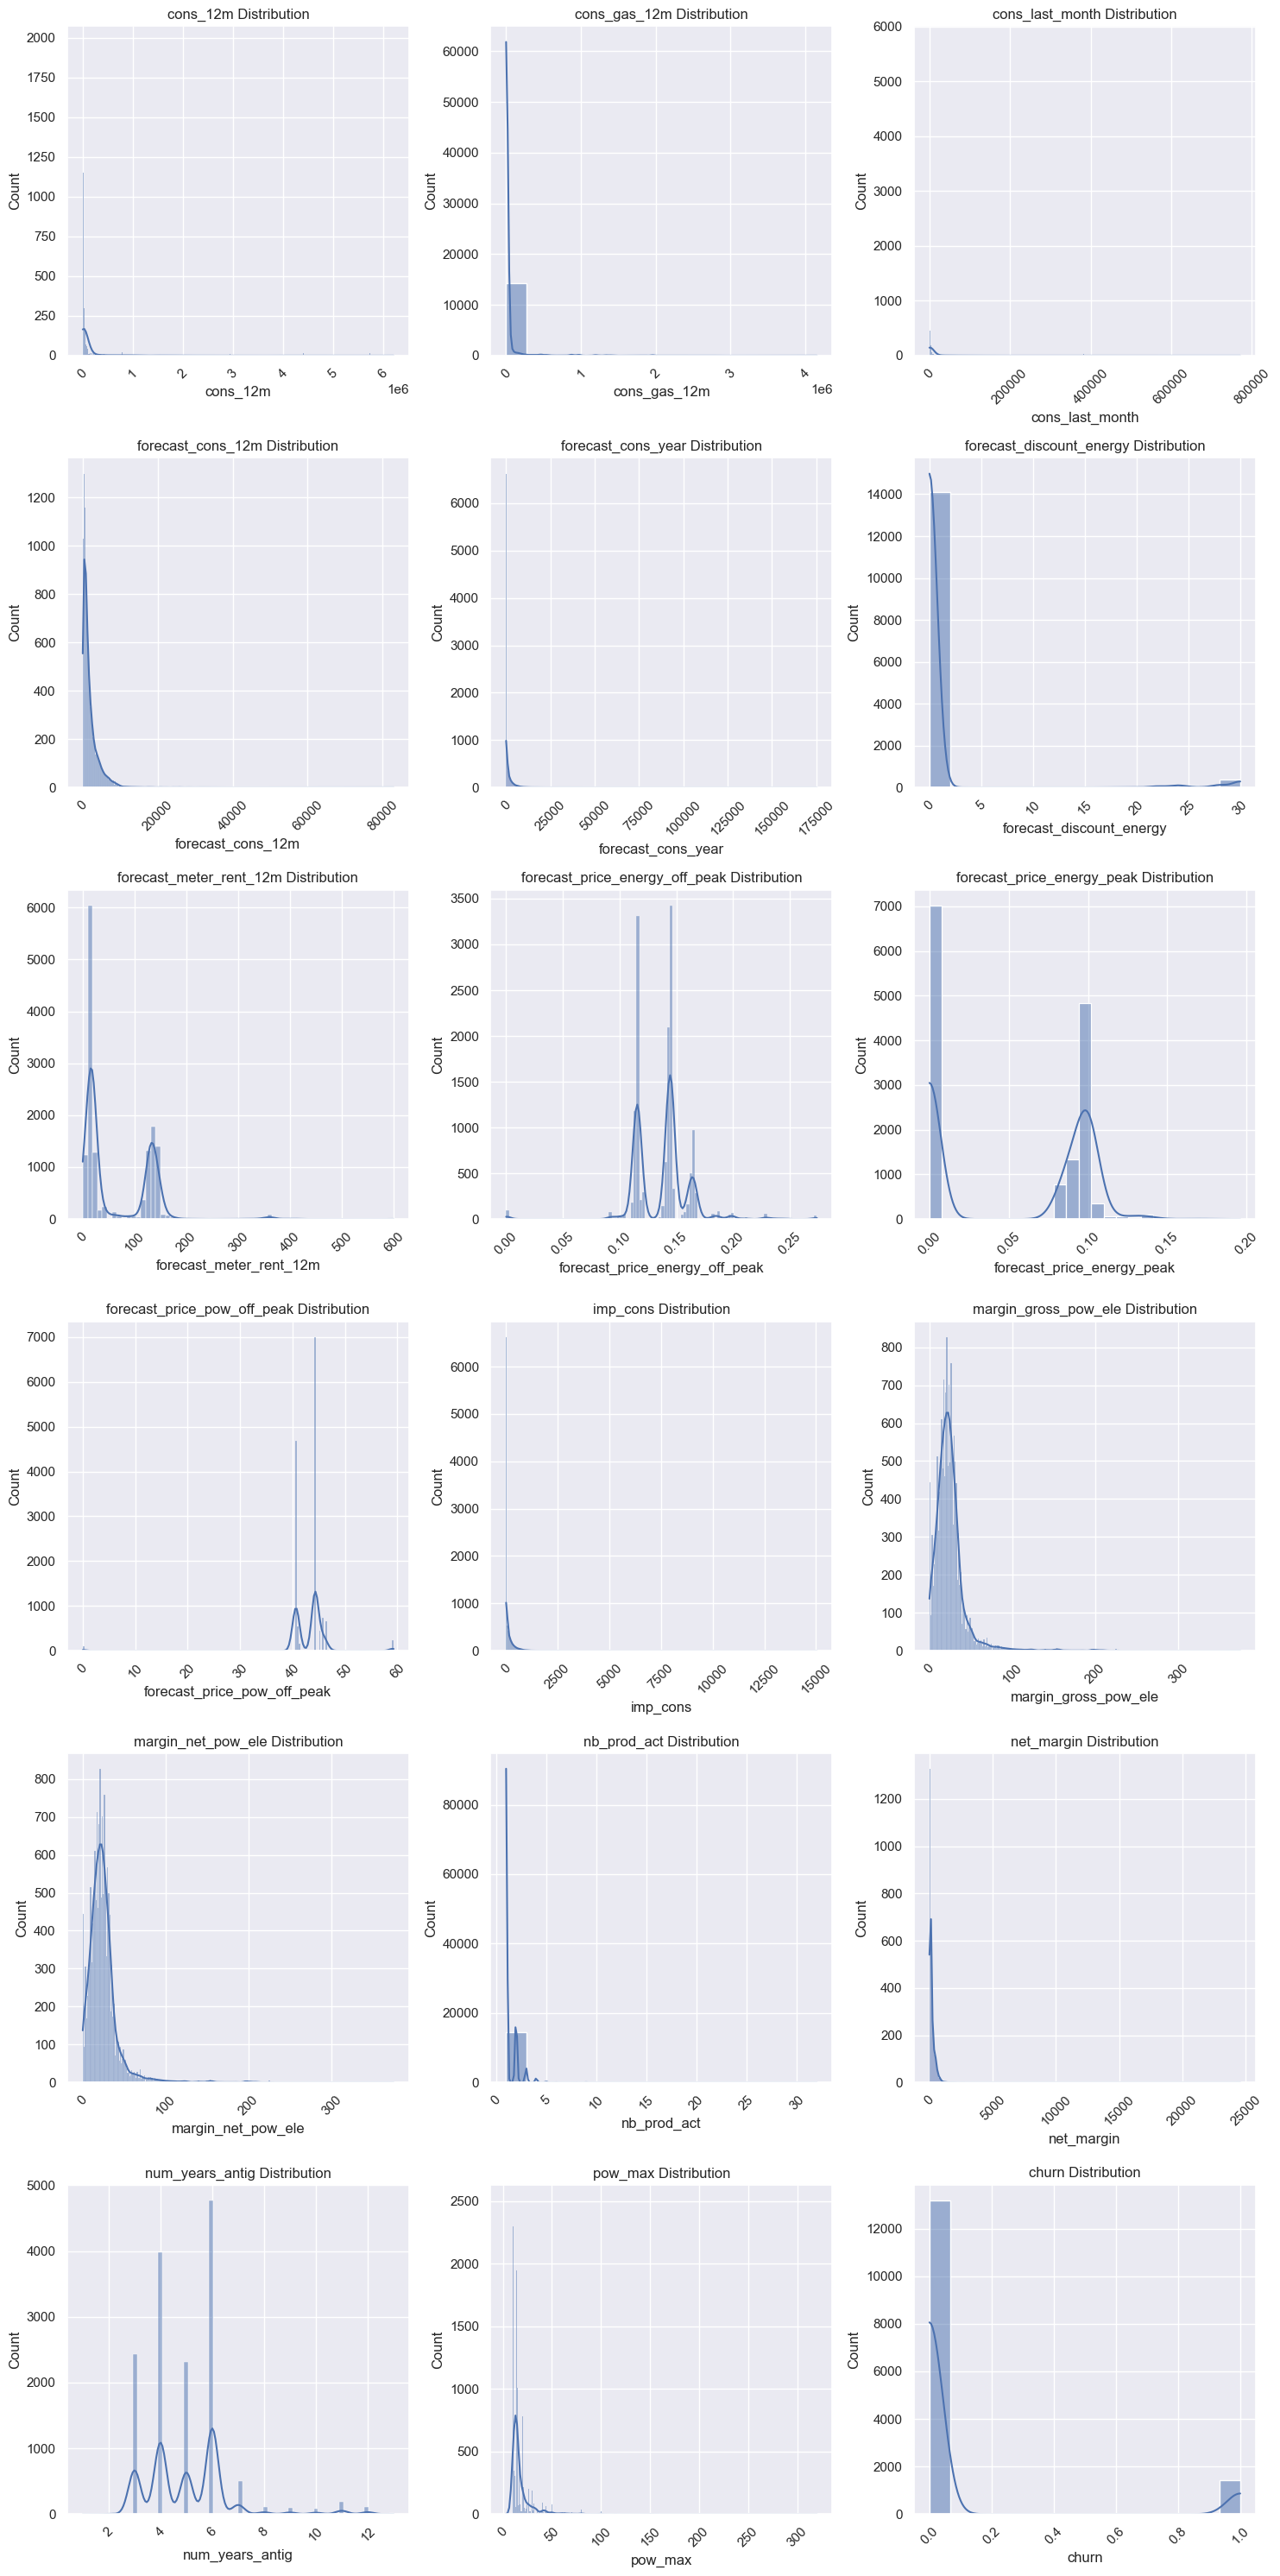

In [14]:
numeric_cols = client_df.select_dtypes(include=['int64', 'float64']).columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5*n_rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(client_df[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

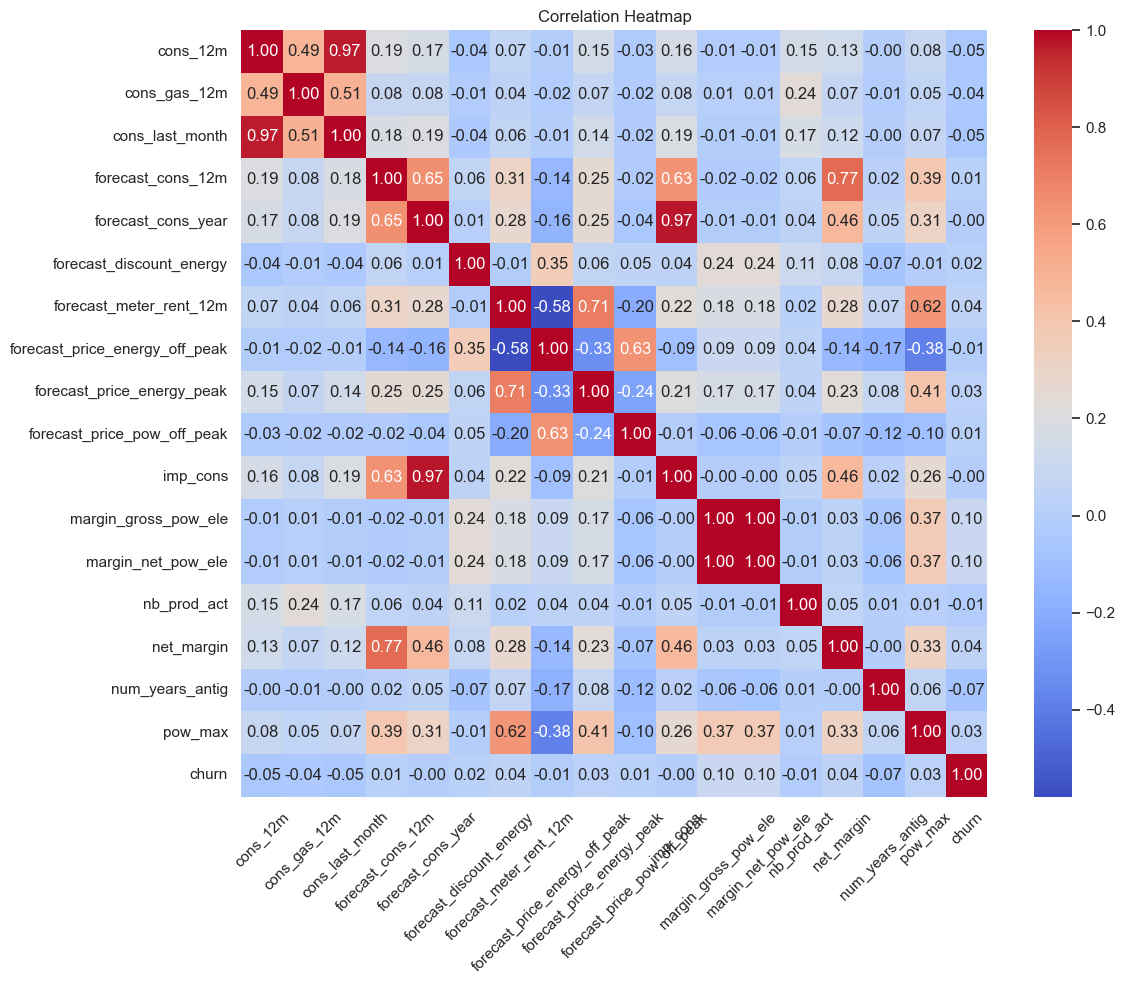

In [15]:
plt.figure(figsize=(12, 10))
correlation_matrix = client_df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

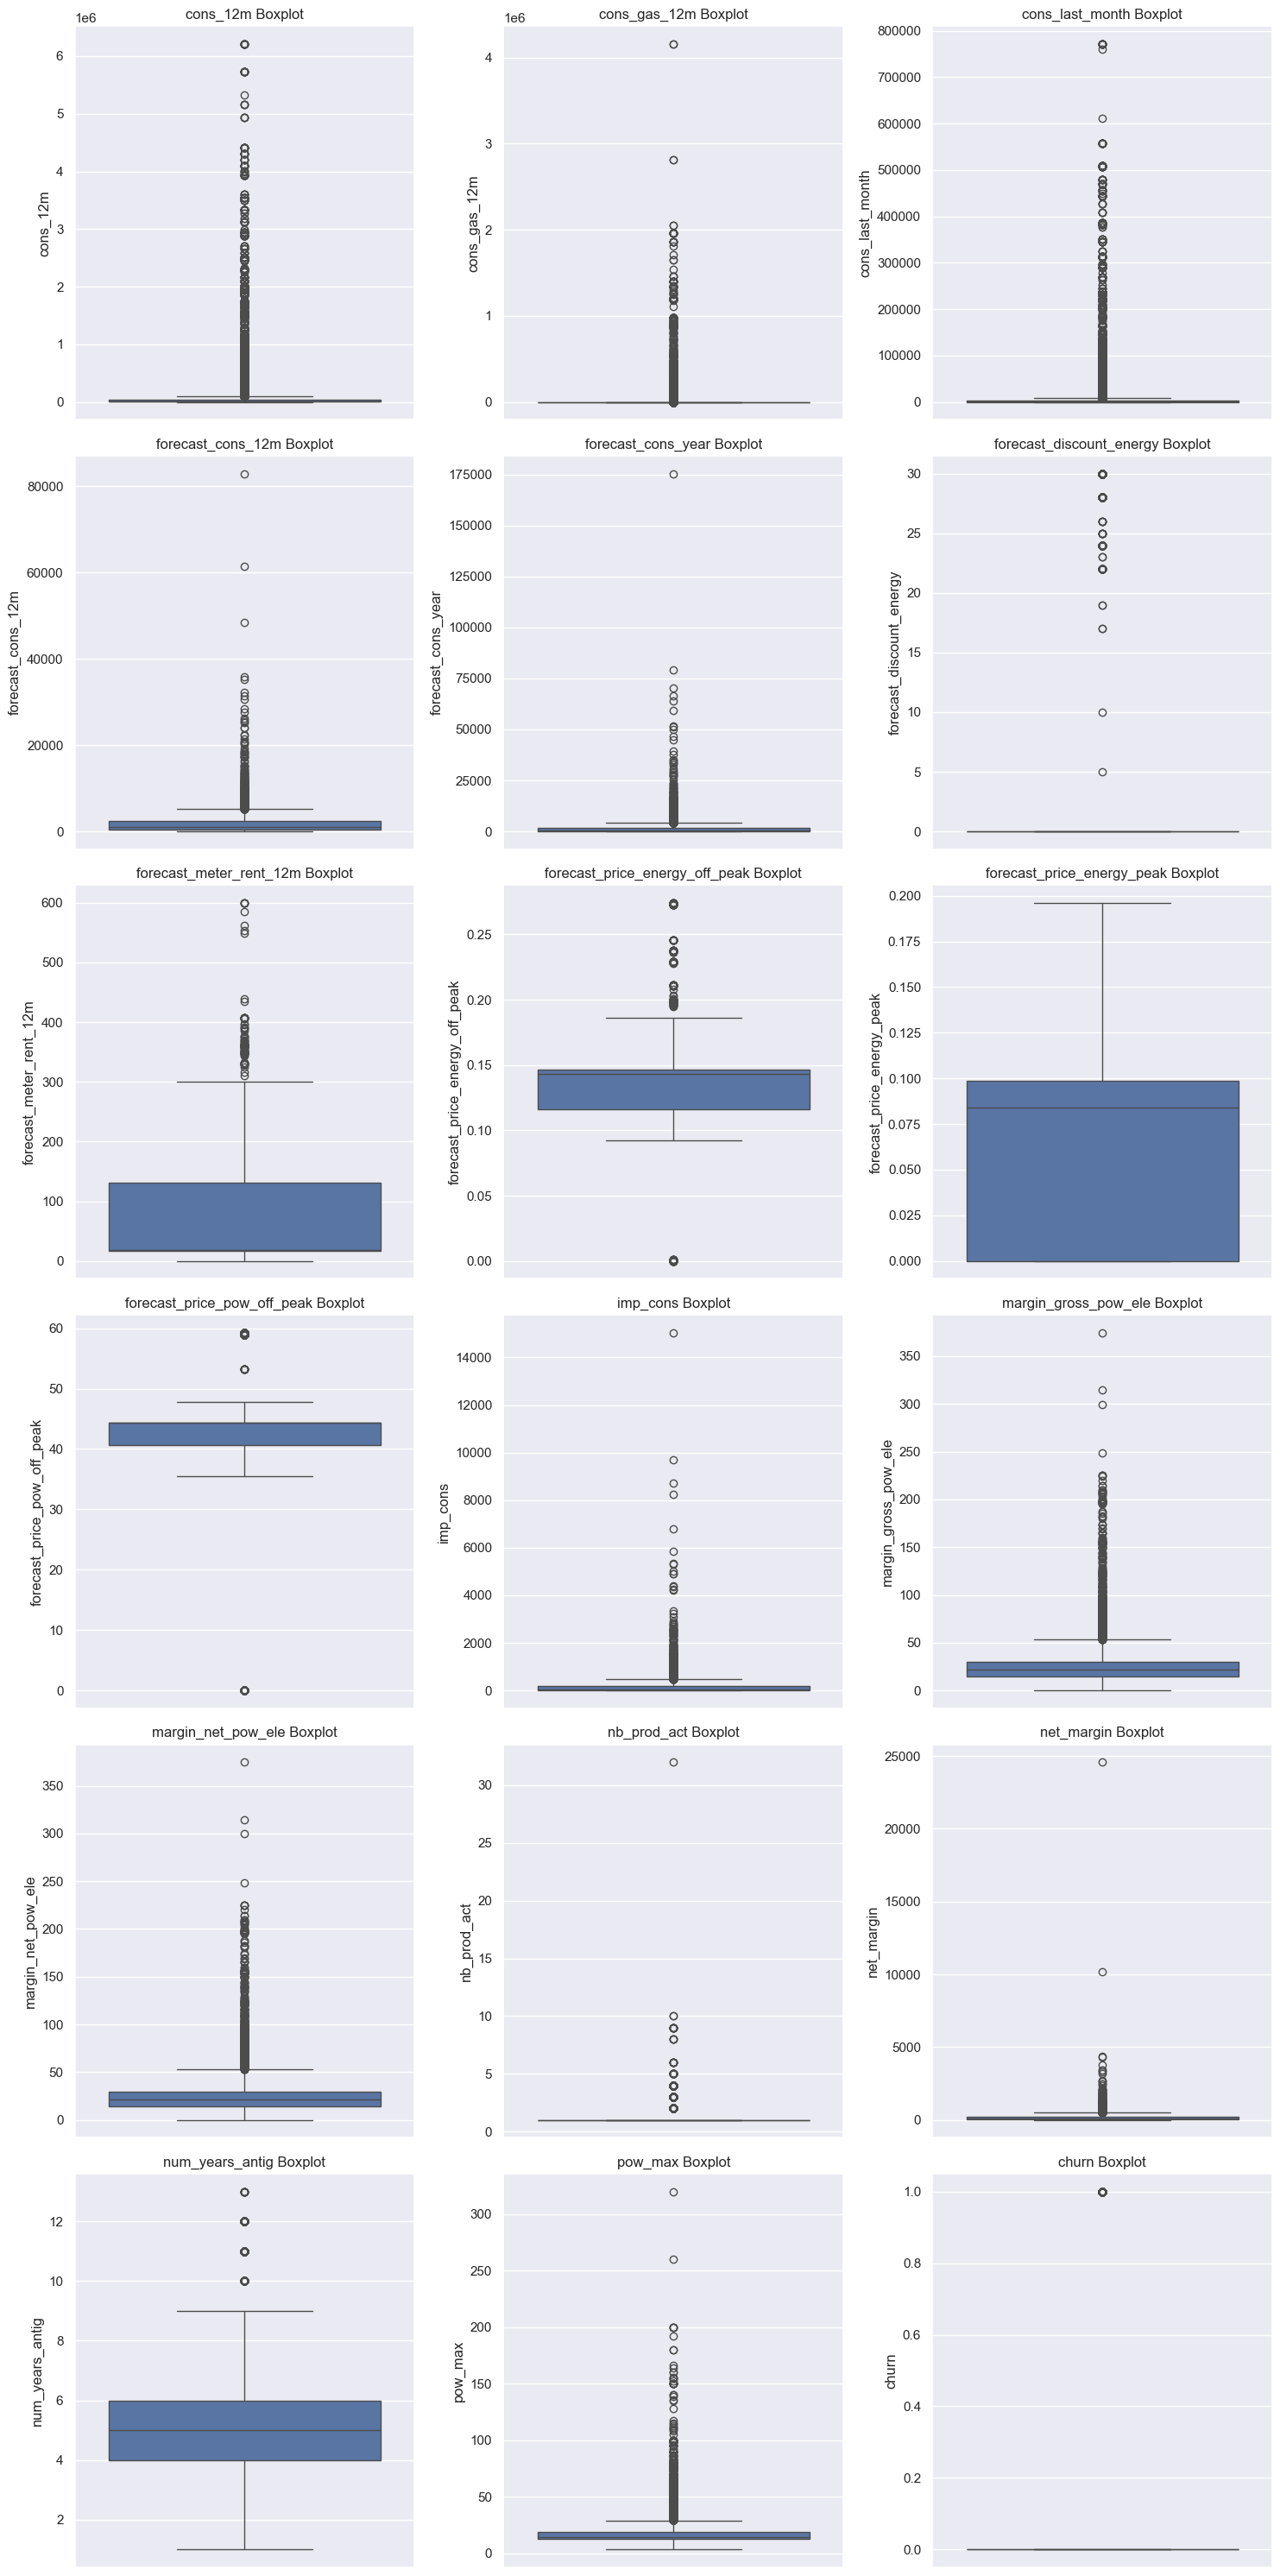

In [16]:
# 4. 箱型图分析
plt.figure(figsize=(15, 5*n_rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=client_df[col])
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()


Analysis for id:
Unique values: 14606

Value counts:
id
563dde550fd624d7352f3de77c0cdfcd    1
24011ae4ebbe3035111d65fa7c15bc57    1
d29c2c54acc38ff3c0614d0a653813dd    1
764c75f661154dac3a6c254cd082ea7d    1
bba03439a292a1e166f80264c16191cb    1
Name: count, dtype: int64


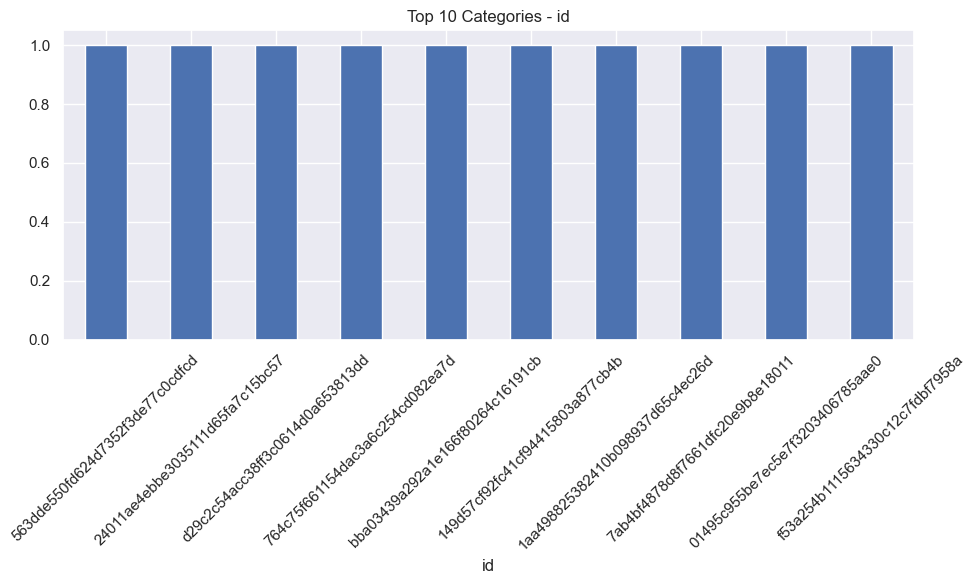


Analysis for channel_sales:
Unique values: 8

Value counts:
channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
Name: count, dtype: int64


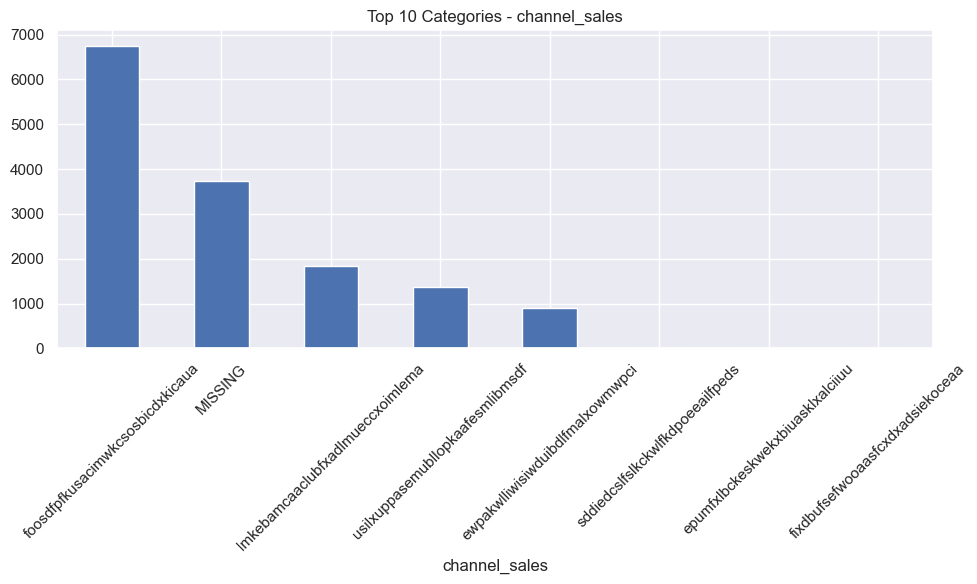


Analysis for date_activ:
Unique values: 1796

Value counts:
date_activ
2009-08-01    95
2010-02-01    92
2009-09-01    76
2009-10-01    55
2010-01-11    48
Name: count, dtype: int64


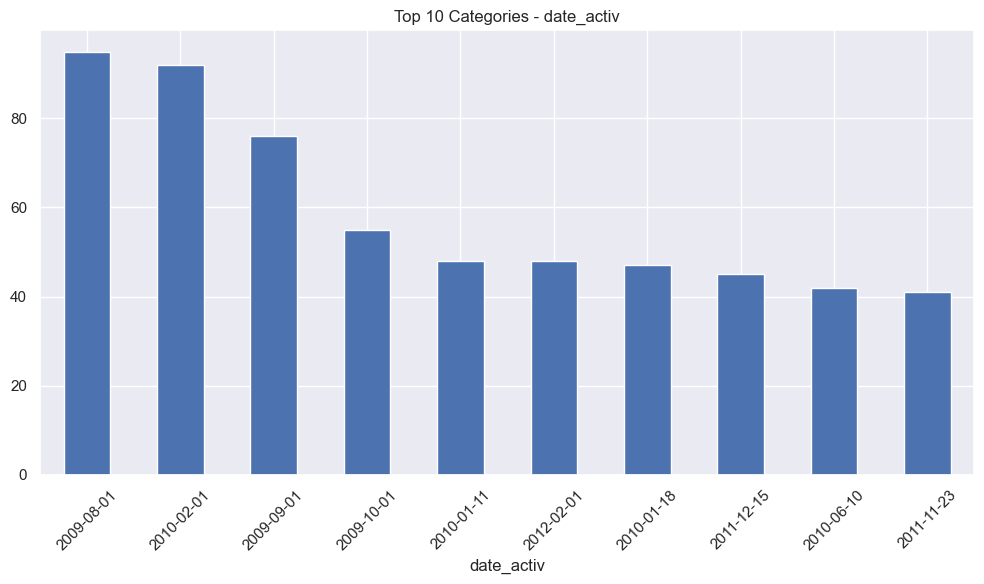


Analysis for date_end:
Unique values: 368

Value counts:
date_end
2016-02-01    145
2016-08-01    125
2016-09-01    117
2016-10-05    115
2016-12-31    104
Name: count, dtype: int64


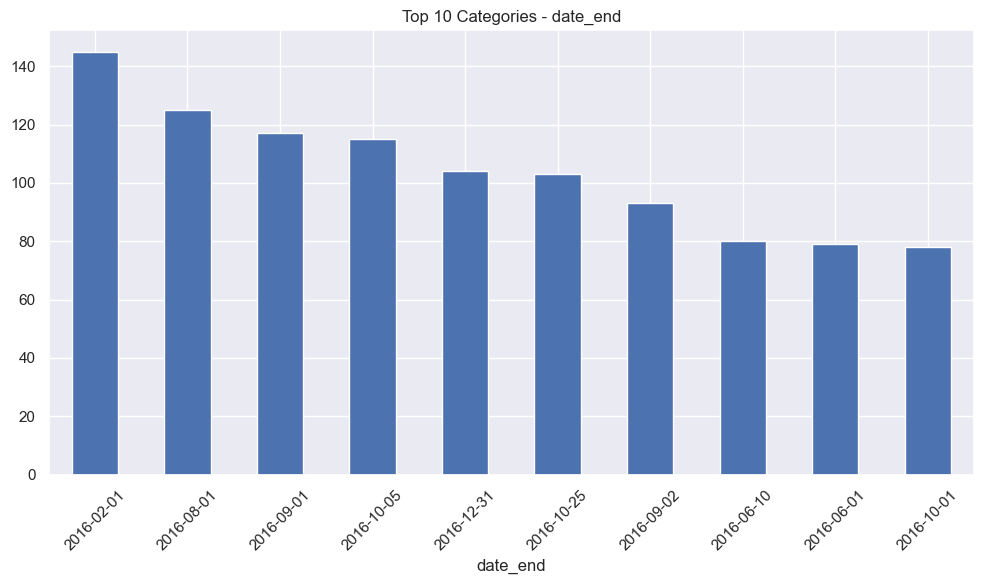


Analysis for date_modif_prod:
Unique values: 2129

Value counts:
date_modif_prod
2015-11-01    721
2015-05-24    269
2015-12-17    199
2015-09-20    173
2015-12-16    172
Name: count, dtype: int64


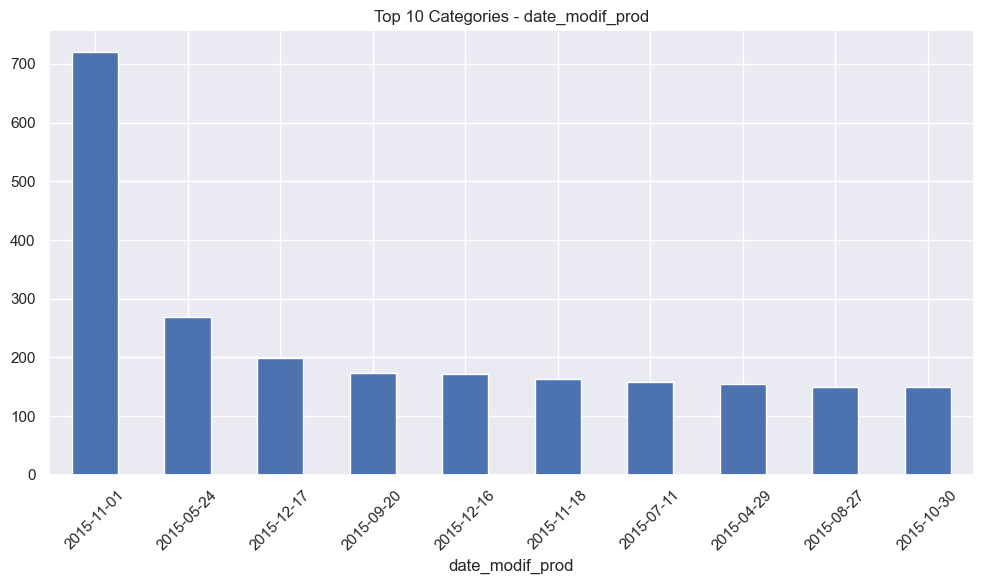


Analysis for date_renewal:
Unique values: 386

Value counts:
date_renewal
2015-06-23    587
2015-03-09    451
2015-02-09    273
2015-07-04    265
2015-10-11    231
Name: count, dtype: int64


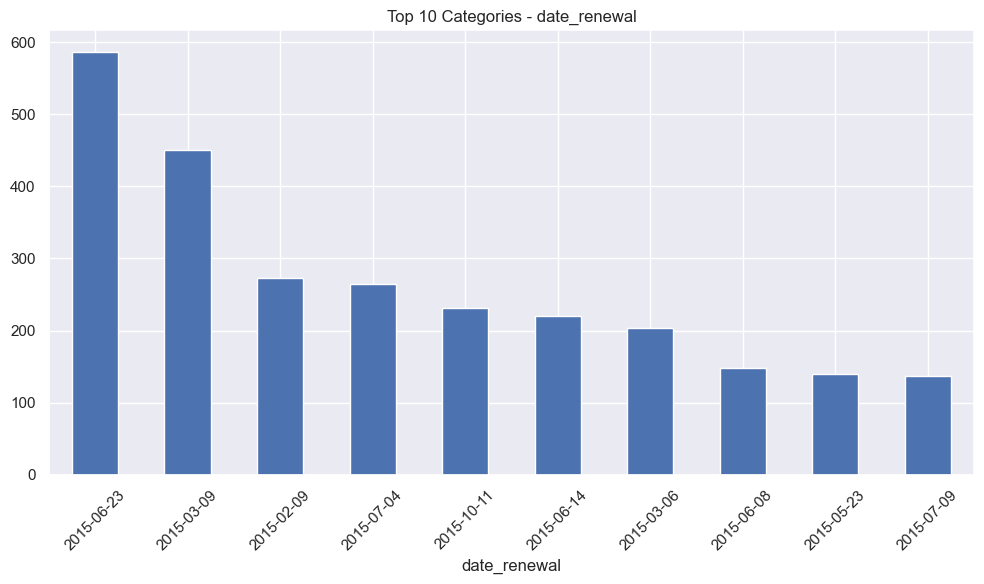


Analysis for has_gas:
Unique values: 2

Value counts:
has_gas
f    11955
t     2651
Name: count, dtype: int64


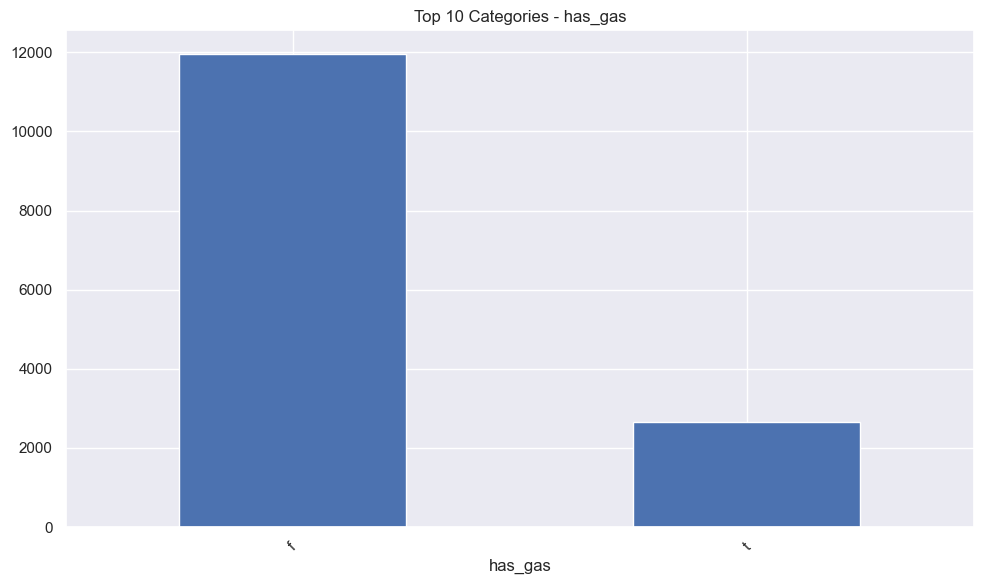


Analysis for origin_up:
Unique values: 6

Value counts:
origin_up
lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
Name: count, dtype: int64


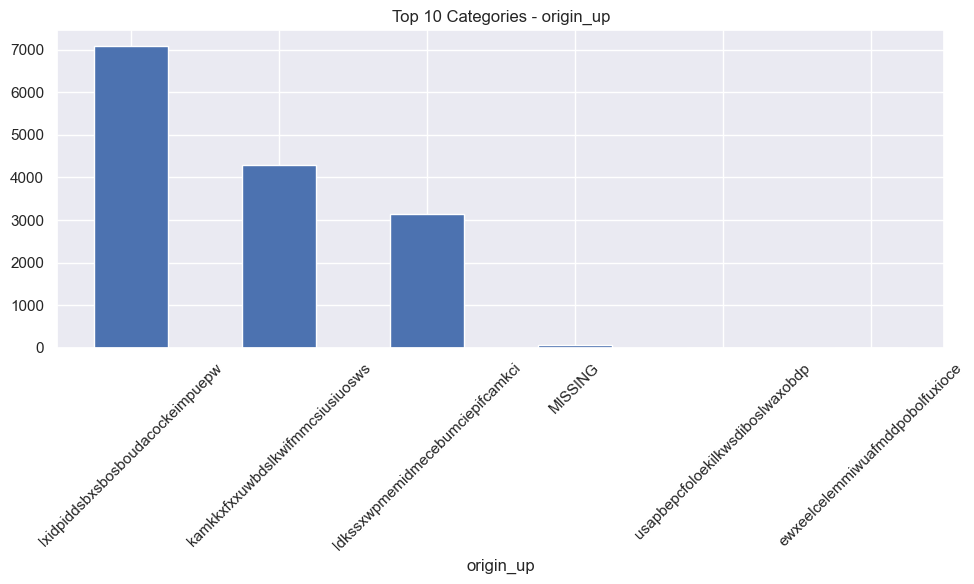

In [18]:
# 5. 类别变量分析
categorical_cols = client_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nAnalysis for {col}:")
    print(f"Unique values: {client_df[col].nunique()}")
    print("\nValue counts:")
    print(client_df[col].value_counts().head())
    
    plt.figure(figsize=(10, 6))
    client_df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Top 10 Categories - {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


date_activ Analysis:
date_activ
2003      39
2004     137
2005     189
2006      36
2007      95
2008     124
2009    2690
2010    3609
2011    2758
2012    3704
2013    1224
2014       1
Name: count, dtype: int64


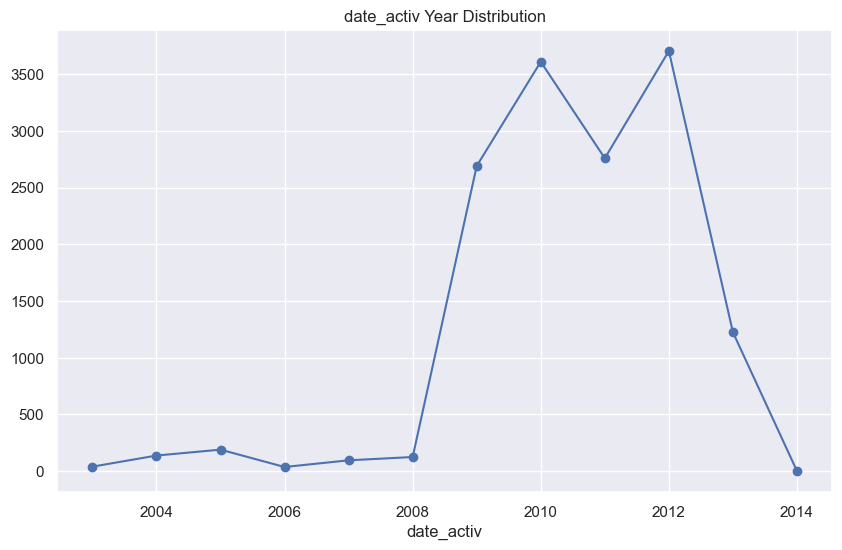


date_end Analysis:
date_end
2016    13663
2017      943
Name: count, dtype: int64


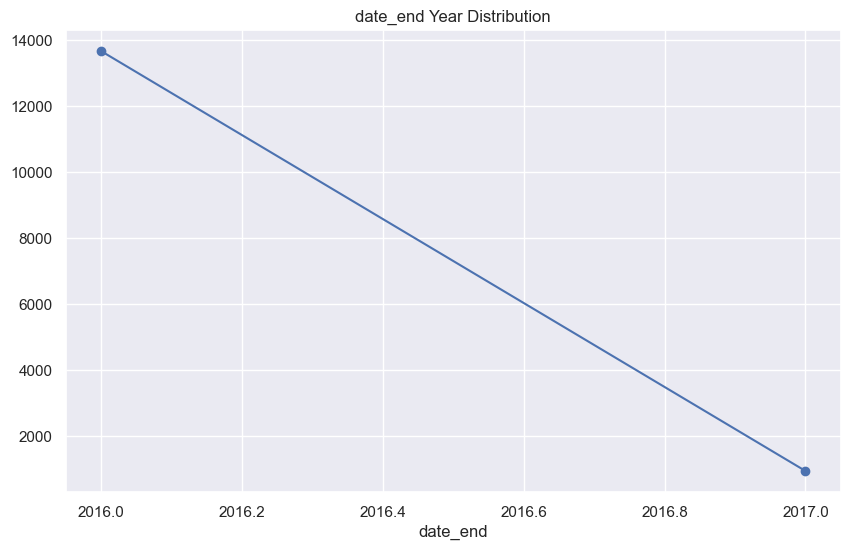


date_modif_prod Analysis:
date_modif_prod
2003      22
2004      70
2005     104
2006      26
2007      78
2008      78
2009    1499
2010    2248
2011    1296
2012    1385
2013    1243
2014    1516
2015    4974
2016      67
Name: count, dtype: int64


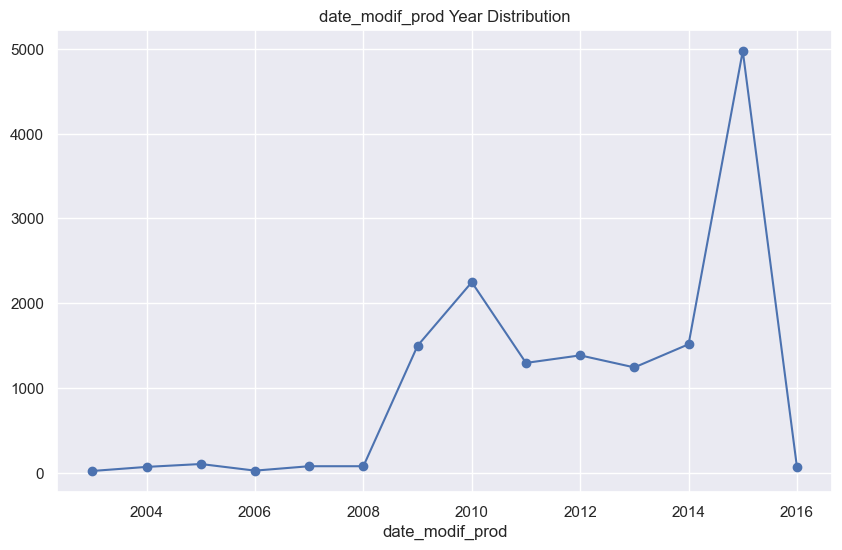


date_renewal Analysis:
date_renewal
2013       25
2014      278
2015    13297
2016     1006
Name: count, dtype: int64


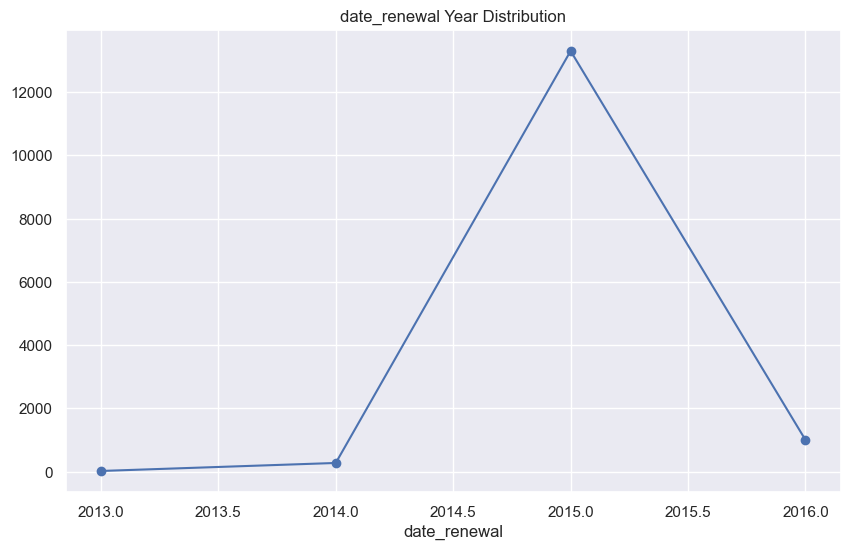

In [19]:
date_columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
for col in date_columns:
    if col in client_df.columns:
        client_df[col] = pd.to_datetime(client_df[col])
        print(f"\n{col} Analysis:")
        print(client_df[col].dt.year.value_counts().sort_index())
        
        plt.figure(figsize=(10, 6))
        client_df[col].dt.year.value_counts().sort_index().plot(kind='line', marker='o')
        plt.title(f'{col} Year Distribution')
        plt.grid(True)
        plt.show()


cons_12m Statistics:
count    1.460600e+04
mean     1.592203e+05
std      5.734653e+05
min      0.000000e+00
25%      5.674750e+03
50%      1.411550e+04
75%      4.076375e+04
max      6.207104e+06
Name: cons_12m, dtype: float64


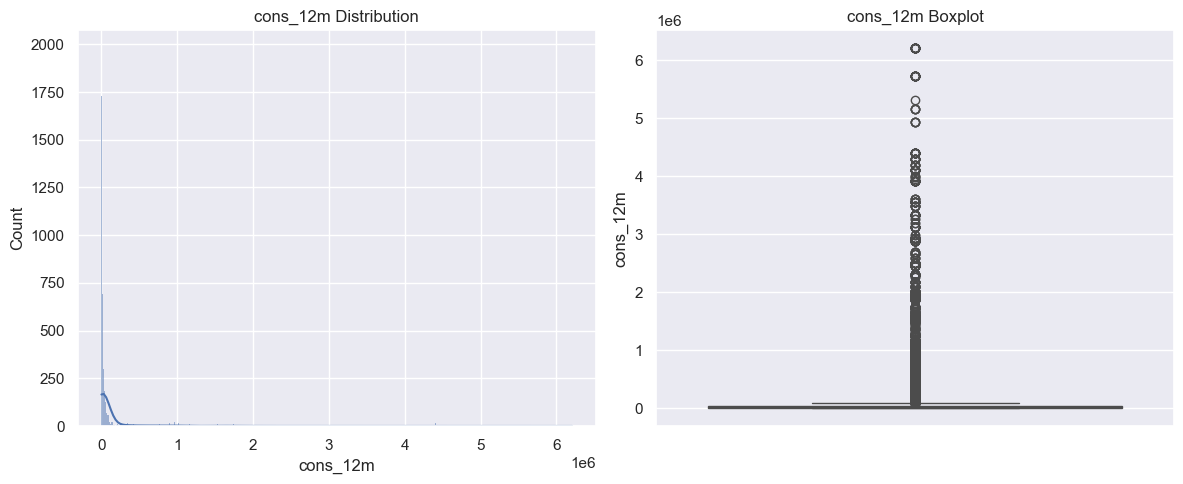


cons_gas_12m Statistics:
count    1.460600e+04
mean     2.809238e+04
std      1.629731e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.154590e+06
Name: cons_gas_12m, dtype: float64


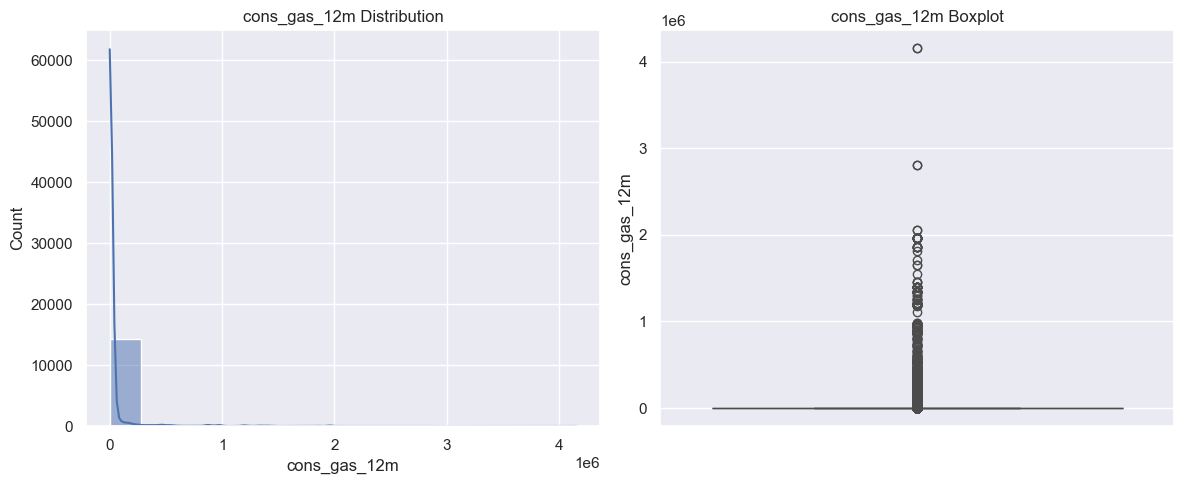


forecast_cons_12m Statistics:
count    14606.000000
mean      1868.614880
std       2387.571531
min          0.000000
25%        494.995000
50%       1112.875000
75%       2401.790000
max      82902.830000
Name: forecast_cons_12m, dtype: float64


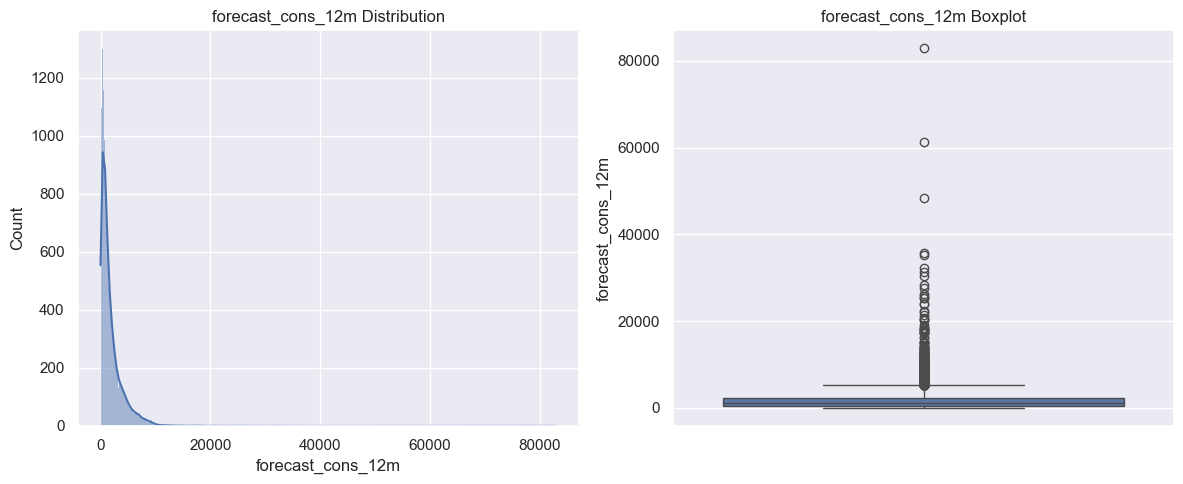

In [20]:
# 7. 关键业务指标分析
business_metrics = ['cons_12m', 'cons_gas_12m', 'forecast_cons_12m']
for metric in business_metrics:
    print(f"\n{metric} Statistics:")
    print(client_df[metric].describe())
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(client_df[metric], kde=True)
    plt.title(f'{metric} Distribution')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(y=client_df[metric])
    plt.title(f'{metric} Boxplot')
    plt.tight_layout()
    plt.show()

In [21]:
# 8. 异常值检测
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers), outliers

print("\nOutlier Analysis:")
for col in numeric_cols:
    outlier_count, _ = detect_outliers(client_df, col)
    print(f"{col}: {outlier_count} outliers detected")


Outlier Analysis:
cons_12m: 2084 outliers detected
cons_gas_12m: 2612 outliers detected
cons_last_month: 2051 outliers detected
forecast_cons_12m: 1054 outliers detected
forecast_cons_year: 1298 outliers detected
forecast_discount_energy: 512 outliers detected
forecast_meter_rent_12m: 152 outliers detected
forecast_price_energy_off_peak: 371 outliers detected
forecast_price_energy_peak: 0 outliers detected
forecast_price_pow_off_peak: 345 outliers detected
imp_cons: 1215 outliers detected
margin_gross_pow_ele: 660 outliers detected
margin_net_pow_ele: 660 outliers detected
nb_prod_act: 3175 outliers detected
net_margin: 1022 outliers detected
num_years_antig: 389 outliers detected
pow_max: 1535 outliers detected
churn: 1419 outliers detected


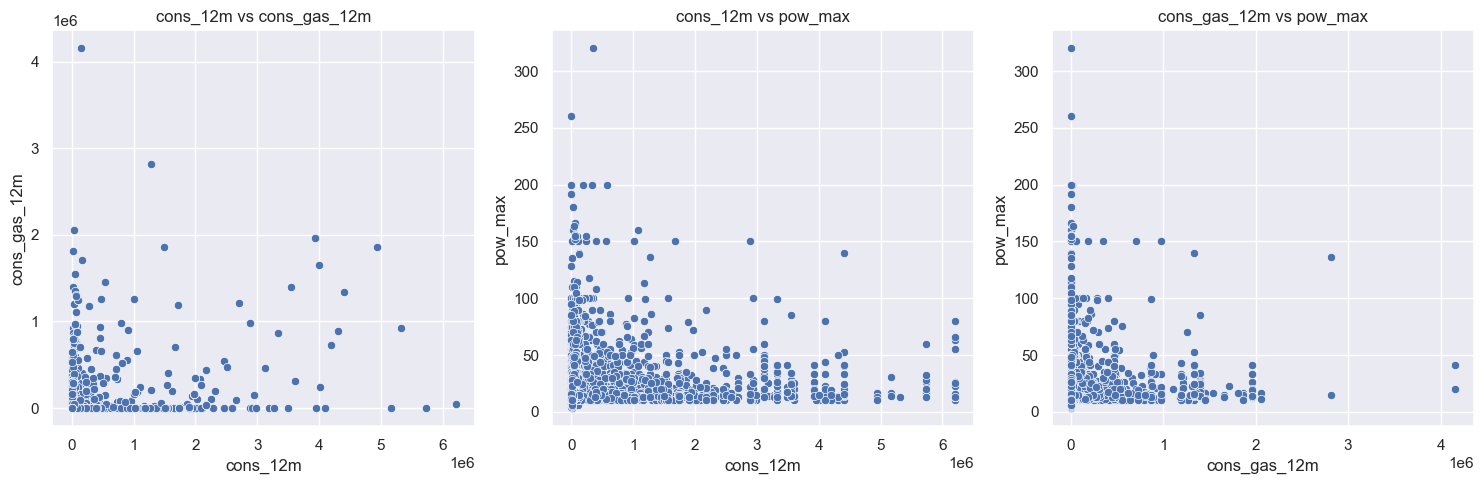

In [22]:
# 9. 数值变量间的散点图分析
key_vars = ['cons_12m', 'cons_gas_12m', 'pow_max']
plt.figure(figsize=(15, 5))
plot_idx = 1
for i in range(len(key_vars)):
    for j in range(i+1, len(key_vars)):
        plt.subplot(1, 3, plot_idx)
        sns.scatterplot(data=client_df, x=key_vars[i], y=key_vars[j])
        plt.title(f'{key_vars[i]} vs {key_vars[j]}')
        plot_idx += 1
plt.tight_layout()
plt.show()

In [10]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

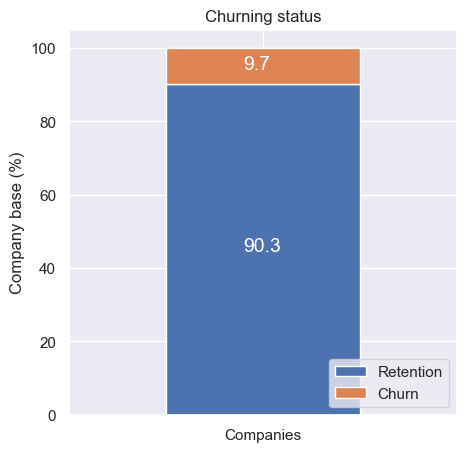

In [11]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

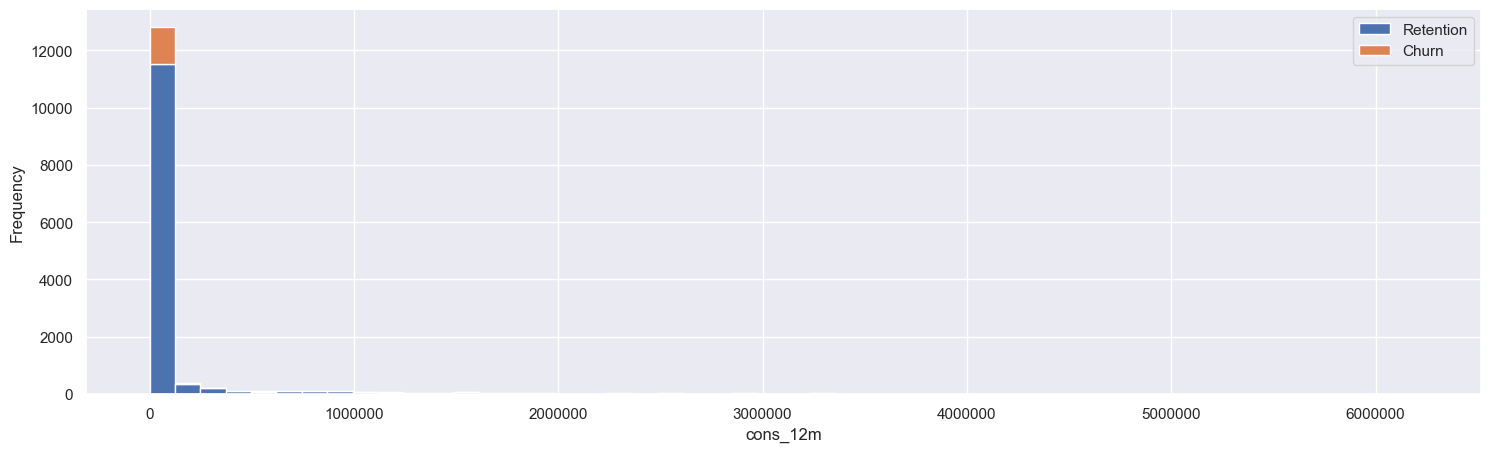

In [12]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)